### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('influenza')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],unidentified influenza virus,unidentified influenza virus,12.0,False,CHEMBL613128,[],ORGANISM,11309
1,[],Influenza B virus,Influenza B virus,12.0,False,CHEMBL613129,[],ORGANISM,11520
2,[],Influenza A virus,Influenza A virus,12.0,False,CHEMBL613740,[],ORGANISM,11320
3,[],Influenza C virus,Influenza C virus,12.0,False,CHEMBL612783,[],ORGANISM,11552
4,"[{'xref_id': 'P03438', 'xref_name': None, 'xre...",Influenza A virus (strain A/X-31 H3N2),Influenza A virus Hemagglutinin,11.0,False,CHEMBL4918,"[{'accession': 'P03438', 'component_descriptio...",SINGLE PROTEIN,132504
5,[],Influenza A virus (H5N1),Influenza A virus (H5N1),11.0,False,CHEMBL613845,[],ORGANISM,102793
6,[],Influenza A virus H3N2,Influenza A virus H3N2,11.0,False,CHEMBL2366902,[],ORGANISM,41857
7,"[{'xref_id': 'P63231', 'xref_name': None, 'xre...",Influenza A virus (A/Udorn/307/1972(H3N2)),Influenza virus A matrix protein M2,9.0,False,CHEMBL2052,"[{'accession': 'P0DOF8', 'component_descriptio...",SINGLE PROTEIN,381517
8,[],Influenza B virus (B/Lee/40),Influenza B virus (B/Lee/40),9.0,False,CHEMBL612452,[],ORGANISM,107412
9,[],Influenza A virus,Matrix protein 2,9.0,False,CHEMBL1932894,"[{'accession': 'P06821', 'component_descriptio...",SINGLE PROTEIN,11320


In [5]:
selected_target1 = target_result.target_chembl_id[1]
selected_target1

'CHEMBL613129'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,76867,[],CHEMBL808329,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,...,Influenza B virus,Influenza B virus,11520,None,None,IC50,mM,UO_0000065,None,3.0
1,None,76869,[],CHEMBL809002,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,...,Influenza B virus,Influenza B virus,11520,None,None,IC50,mM,UO_0000065,None,10.0
2,None,77907,[],CHEMBL808329,The compound was tested in vitro for the inhib...,F,None,None,BAO_0000190,BAO_0000218,...,Influenza B virus,Influenza B virus,11520,None,None,IC50,mM,UO_0000065,None,0.75


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

254

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles       0
molecule_chembl_id     0
standard_value        14
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0     3000000.0
1    10000000.0
2      750000.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
len(df1_selected)

254

In [19]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [20]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [21]:
df1_selected.describe()

,standard_value
count,2.540000e+02
mean,8.541345e+05
std,2.613145e+06
min,2.000000e-03
25%,1.852000e+01
50%,1.815000e+04
75%,1.103750e+05
max,2.000000e+07


In [22]:
df1_selected['standard_value'] = norm_val(df1_selected)

<ipython-input-22-1651fe78b754>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = norm_val(df1_selected)


In [23]:
df1_selected['standard_value'] = convert_log(df1_selected)

<ipython-input-20-31a96a23224e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
<ipython-input-23-dc51576c3f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = convert_log(df1_selected)


In [24]:
df1_selected['standard_value'].head()

0    2.522879
1    8.091947
2    3.124939
3    8.093158
4    2.698970
Name: standard_value, dtype: float64

In [25]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [26]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Creating labels and features

In [27]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [28]:
len(df1_x),len(df1_y)

(254, 254)

In [29]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('influenzaB_labels.csv',index=False)

### A quick look at files

In [30]:
! ls

influenzaB_labels.csv  molecule.smi  sample_data


In [31]:
! cat molecule.smi | head -5

CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO	CHEMBL327097
CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CO	CHEMBL327097
CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-]	CHEMBL324455
CC(=O)Nc1c(O)cc(C(=O)O)cc1[N+](=O)[O-]	CHEMBL324455
CC(=O)Nc1c(OC(C)=O)cc(C(=O)O)cc1[N+](=O)[O-]	CHEMBL321393


### Using padel Descriptor to break it into dataset form

In [32]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 13:39:16--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 13:39:17--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   119MB/s    in 0.2s    

2023-03-10 13:39:17 (119 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 13:39:17--  https://github

In [33]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [34]:
! bash padel.sh

Processing CHEMBL327097 in molecule.smi (1/254). 
Processing CHEMBL327097 in molecule.smi (2/254). 
Processing CHEMBL324455 in molecule.smi (3/254). Average speed: 5.22 s/mol.
Processing CHEMBL324455 in molecule.smi (4/254). Average speed: 2.63 s/mol.
Processing CHEMBL321393 in molecule.smi (5/254). Average speed: 1.93 s/mol.
Processing CHEMBL321393 in molecule.smi (6/254). Average speed: 1.56 s/mol.
Processing CHEMBL109162 in molecule.smi (7/254). Average speed: 1.34 s/mol.
Processing CHEMBL111082 in molecule.smi (8/254). Average speed: 1.16 s/mol.
Processing CHEMBL111082 in molecule.smi (9/254). Average speed: 1.08 s/mol.
Processing CHEMBL55440 in molecule.smi (10/254). Average speed: 0.96 s/mol.
Processing CHEMBL55440 in molecule.smi (11/254). Average speed: 0.91 s/mol.
Processing CHEMBL111756 in molecule.smi (12/254). Average speed: 0.86 s/mol.
Processing CHEMBL111756 in molecule.smi (13/254). Average speed: 0.80 s/mol.
Processing CHEMBL420491 in molecule.smi (15/254). Average spee

### Model selection and usage

### Importing Modules

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [36]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('influenzaB_labels.csv')

In [37]:
Y['standard_value'].isnull().sum()

0

In [38]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [39]:
Y.standard_value.unique()

array([ 2.52,  8.09,  3.12,  2.7 ,  8.62,  1.7 ,  8.08,  2.1 ,  8.32,
        6.33,  5.13,  7.49,  4.38,  8.19,  7.93,  7.8 , 10.7 ,  7.36,
        9.49,  8.42,  8.04,  8.66,  9.55,  8.02,  8.15, 10.25,  8.26,
        4.08,  3.17,  3.47,  5.19,  5.29,  3.18,  7.07,  6.4 ,  8.34,
        4.5 ,  4.63,  4.42,  4.02,  2.3 ,  3.61,  4.82,  3.65,  4.18,
        3.79,  2.8 ,  4.66,  4.06,  5.37,  1.83,  7.05,  4.72,  8.11,
        5.68,  4.3 ,  8.38,  7.52,  7.7 ,  7.4 ,  5.  ,  4.83,  5.49,
        4.95,  4.76,  4.69,  4.31,  4.28,  4.17,  4.11,  3.45,  4.  ,
        3.82,  3.8 ,  4.6 ,  4.59,  4.58,  4.57,  4.55,  4.51,  3.5 ,
        4.48,  4.46,  2.39,  3.3 ,  4.25,  4.1 ,  8.29,  5.02,  4.04,
        3.62,  3.9 ,  4.67,  4.19,  4.34,  8.49,  9.14,  9.68,  8.48,
        9.04,  6.74,  7.87,  8.17,  8.41,  8.33,  8.14,  8.68,  8.77,
        7.95,  7.73,  8.05,  8.65,  7.89,  7.83,  6.  ,  5.96,  5.05,
        7.14,  8.92,  7.96,  7.26,  8.06,  7.62,  9.1 ,  6.94,  4.77,
        8.51,  7.48,

In [40]:
Y.describe()

,standard_value
count,254.000000
mean,6.528031
std,2.050769
min,1.700000
25%,4.485000
50%,7.955000
75%,8.090000
max,10.700000


In [41]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [42]:
X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Y[:5]

array([2.52, 8.09, 3.12, 8.09, 2.7 ])

In [44]:
X.shape

(254, 881)

### Defining all the Regressors

In [45]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [46]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [47]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.2167283935941774

Mean Sqaured Error : 3.358346907635994

Mean Absolute Error : 1.3117490429586762

Root Mean Squared : 1.8325793045966643


### Decision Tree Regressor

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.07214829215528096

Mean Sqaured Error : 4.59693147567175

Mean Absolute Error : 1.38239651416122

Root Mean Squared : 2.1440455861925485


### Support Vector Regressor

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.12351795401279875

Mean Sqaured Error : 3.757994984966309

Mean Absolute Error : 1.4646891091635015

Root Mean Squared : 1.9385548702490494


### Extra Tree Regression

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.0964738333474815

Mean Sqaured Error : 4.701229404220779

Mean Absolute Error : 1.4084286710239682

Root Mean Squared : 2.168231861268711


### Lasso Regression

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.0019110932894736976

Mean Sqaured Error : 4.295783217924506

Mean Absolute Error : 1.958607167004733

Root Mean Squared : 2.0726271294964045


### Ridge Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.19904842643883325

Mean Sqaured Error : 3.4341513444848033

Mean Absolute Error : 1.3040000040846162

Root Mean Squared : 1.8531463365003864


### Orthogonal Matching Pursuit Regressor

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -1.9317421483943003

Mean Sqaured Error : 12.570106074986292

Mean Absolute Error : 2.114778516033159

Root Mean Squared : 3.545434539656076


### Linear Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -2.1154271624595067e+21

Mean Sqaured Error : 9.070082728996849e+21

Mean Absolute Error : 37707276475.727486

Root Mean Squared : 95236981939.77405


### Model Performance

In [56]:
import seaborn as sns

In [57]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [58]:
model_performance = pd.DataFrame.from_dict(di)

In [59]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,1.832579e+00,2.167284e-01
1,Decision Tree,2.144046e+00,-7.214829e-02
2,Support Vector,1.938555e+00,1.235180e-01
3,Extra Tree,2.168232e+00,-9.647383e-02
4,Lasso,2.072627e+00,-1.911093e-03
5,Ridge,1.853146e+00,1.990484e-01
6,Orthogonal,3.545435e+00,-1.931742e+00
7,Linear,9.523698e+10,-2.115427e+21


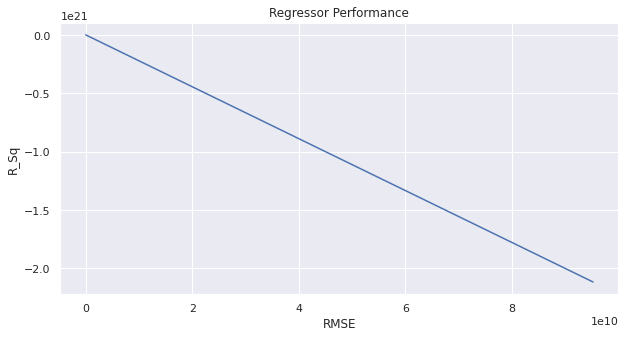

In [60]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [65]:
rmse

1.8153251179931627

### Saving model state for later use

In [66]:
import pickle

pickle.dump(rfe,open("influenzaB_model.pkl","wb"))